### INFO 284 – Machine Learning
#### Spring 2021
### Lab week 11 (Mar 15st – Mar 19th)
Neural networks and Colab
For practical purposes it may be useful to work with Colab to develop common python code. In
addition to being a collaboration tool it is also a service that gives access to computing resources. In
particular, when learning neural networks this may useful.
So check out Colab (https://colab.research.google.com/notebooks/intro.ipynb), and use it for this
week’s lab.
One of the data sets we have worked with is the churn data set:
https://www.kaggle.com/blastchar/telco-customer-churn
We shall work with this data set also this week, but now with the use of neural networks.
Tasks:
1. Prepare the churn data for neural network learning (you may already have done much of this in lab 5).
2. Test out different neural network structures using scikit’s MLPClassifier
    * a. Vary the number of layers
    * b. Vary the number of nodes in each layer
    * c. Test out various activation functions
    * d. Test out regularization (the alpha parameter in MLPClassifier allows for L2
    regularisation of weights)

In [35]:
import pandas as pd

In [36]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

How to upload files to collab: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [37]:
# Upload file from your computer by running this cell and pressing the "Choose file" button
from google.colab import files
uploaded = files.upload()

Saving telco.csv to telco (1).csv


In [38]:
telco = pd.read_csv('telco.csv')

In [39]:
telco.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [40]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Preprocessing

In [42]:
telco.drop("customerID", axis=1, inplace=True)

In [43]:
telco["TotalCharges"] = telco["TotalCharges"].replace(' ', '')

In [44]:
telco["TotalCharges"] = pd.to_numeric(telco["TotalCharges"])

In [45]:
telco = telco.dropna()

In [46]:
telco = telco.reset_index(drop=True)

In [47]:
# Encode target labels with value between 0 and n_classes-1.

from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
telco['Churn'] = lb.fit_transform(telco['Churn'])

In [48]:
cat = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
       "MultipleLines", "InternetService", "OnlineSecurity",
       "OnlineBackup", "DeviceProtection", "TechSupport",
       "StreamingTV", "StreamingMovies", "Contract",
       "PaperlessBilling", "PaymentMethod"]

num = ["tenure", "MonthlyCharges", "TotalCharges"]

In [49]:
data_X = telco.loc[:, telco.columns != "Churn"]
data_Y = telco[["Churn"]]

In [50]:
enc_df = pd.get_dummies(data_X[cat])

In [51]:
from sklearn.preprocessing import StandardScaler

# perform a robust scaler transform of the dataset
ss = StandardScaler()
ss_data = ss.fit_transform(data_X[num])
ss_df = pd.DataFrame(ss_data, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])

In [52]:
data_X = pd.concat([enc_df, ss_df], axis=1)

In [53]:
data_X = data_X.reset_index()

In [54]:
data_X.head()

,index,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,2,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,-1.239504,-0.363923,-0.959649
3,3,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,4,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,-1.239504,0.196178,-0.940457


In [55]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   index                                    7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   gender_Female                            7032 non-null   uint8  
 3   gender_Male                              7032 non-null   uint8  
 4   Partner_No                               7032 non-null   uint8  
 5   Partner_Yes                              7032 non-null   uint8  
 6   Dependents_No                            7032 non-null   uint8  
 7   Dependents_Yes                           7032 non-null   uint8  
 8   PhoneService_No                          7032 non-null   uint8  
 9   PhoneService_Yes                         7032 non-null   uint8  
 10  MultipleLines_No                         7032 no

In [56]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y,
                                                    test_size=0.2,
                                                    shuffle = True,
                                                    stratify=data_Y,
                                                    random_state=1)

In [57]:
train_X = train_X.values
train_Y = train_Y.values.ravel()
test_X = test_X.values
test_Y = test_Y.values.ravel()

### Neural Network
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

## Keras Neural Network
### Keras documentation: https://faroit.com/keras-docs/1.2.0/

#### How to use Free GPU to speed up training time
It is so simple to alter default hardware (CPU to GPU or vice versa); just follow **Edit > Notebook settings or Runtime>Change runtime type and select GPU as Hardware accelerator**

https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d


In [58]:
# Import keras model and layers
from keras.models import Sequential
from keras import layers
from keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm


#### Different types of Keras layers explained: https://machinelearningknowledge.ai/different-types-of-keras-layers-explained-for-beginners/


In [59]:
# Shape of our training data
Input_Shape = train_X.shape[1]
Input_Shape

46

In [60]:
# define the keras model
model = Sequential()

# Add layers to the neural network

# Dense is your regular fully connected NN layer. The first layer of the model contains 16 neurons that take the input from the data and applies the ReLU activation function.
# Keras need to know the shape of the data in order to be able to create their weights. 
model.add(Dense(16, input_dim=train_X.shape[1], activation='relu'))

# The second layer contains 8 neurons and also applies the ReLU activation function
model.add(Dense(8, activation='relu'))

# The third layer contains a single neuron that takes the input form the preceding layer, applies a hard sigmoid activation and gives the classification output as 0 or 1 (Yes/No).
model.add(Dense(1, activation='sigmoid'))


In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                752       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [62]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

loss='binary_crossentropy': Computes the cross-entropy loss between true labels and predicted labels.

Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1). 

In [63]:
# Fit the keras model on the dataset. val_accuracy = accuracy on test set. accuracy = accuracy on training data. 
history = model.fit(train_X, train_Y, 
            epochs=40, 
            batch_size=10, 
            verbose=True,
            validation_data=(test_X, test_Y))

Epoch 1/40
563/563 [==============================] - 2s 3ms/step - loss: 1.4331 - accuracy: 0.6744 - val_loss: 1.8644 - val_accuracy: 0.7392
Epoch 2/40
563/563 [==============================] - 1s 2ms/step - loss: 1.4742 - accuracy: 0.7173 - val_loss: 1.2799 - val_accuracy: 0.7498
Epoch 3/40
563/563 [==============================] - 1s 2ms/step - loss: 1.6316 - accuracy: 0.7196 - val_loss: 0.6022 - val_accuracy: 0.7726
Epoch 4/40
563/563 [==============================] - 1s 2ms/step - loss: 1.3542 - accuracy: 0.7296 - val_loss: 0.5778 - val_accuracy: 0.7790
Epoch 5/40
563/563 [==============================] - 1s 2ms/step - loss: 1.5030 - accuracy: 0.7208 - val_loss: 1.1070 - val_accuracy: 0.6631
Epoch 6/40
563/563 [==============================] - 1s 2ms/step - loss: 1.0685 - accuracy: 0.7506 - val_loss: 0.7562 - val_accuracy: 0.7761
Epoch 7/40
563/563 [==============================] - 1s 2ms/step - loss: 1.5677 - accuracy: 0.7414 - val_loss: 0.7565 - val_accuracy: 0.7804
Epoch 

In [64]:
accuracy = model.evaluate(train_X, train_Y, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.5631
Training Accuracy: 0.7511


In [65]:
accuracy = model.evaluate(test_X, test_Y, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Testing Score: 0.6192
Testing Accuracy: 0.7242


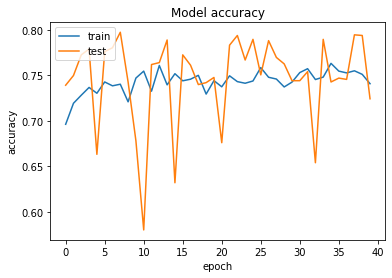

In [66]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()